###Objective
In this notebook, we will scrape Donald Trump Transcripts from https://www.rev.com/blog/transcript-category/donald-trump-transcripts.

According to "USATODAY", Trump has targeted Muslims, Mexicans, Syrian refugees, Africans, congresswomen of color, Black athletes protesting racial inequality and former president Barack Obama, among others https://www.usatoday.com/story/news/politics/elections/2020/10/13/hate-speech-common-theme-trumps-presidency/5873238002/

###Content


###CONTENT

In [1]:
from bs4 import BeautifulSoup
import requests as re
import pandas as pd

##3Get Your Data
re.get gives us the contests or the html codes for the webpage

In [2]:
r = re.get("https://www.rev.com/blog/transcript-category/donald-trump-transcripts?view=all")
print(r.content)

b'<!DOCTYPE html>\n<html lang="en-US">\n<head>\n<meta charset="UTF-8" />\n<meta name=\'viewport\' content=\'width=device-width, initial-scale=1.0\' />\n<meta http-equiv=\'X-UA-Compatible\' content=\'IE=edge\' />\n<link rel="profile" href="https://gmpg.org/xfn/11" />\n<meta property="og:title" content="Rev"/>\n<meta property="og:description" content="Transcription and Captions Blog"/>\n<meta property="og:image:alt" content="Donald Trump CPAC 2021 Speech Transcript"/>\n<meta property="og:image" content="https://www.rev.com/blog/wp-content/uploads/2021/02/Untitled-design-31-1-scaled.jpg"/>\n<meta property="og:image:width" content="2048"/>\n<meta property="og:image:height" content="1152"/>\n<meta property="og:type" content="article"/>\n<meta property="og:article:published_time" content="2021-02-28 20:00:50"/>\n<meta property="og:article:modified_time" content="2021-02-28 23:13:50"/>\n<meta name="twitter:card" content="summary_large_image">\n<meta name="twitter:title" content="Rev"/>\n<meta

In [4]:
soup = BeautifulSoup(r.content)
soup

<!DOCTYPE html>
<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<meta content="Rev" property="og:title"/>
<meta content="Transcription and Captions Blog" property="og:description"/>
<meta content="Donald Trump CPAC 2021 Speech Transcript" property="og:image:alt"/>
<meta content="https://www.rev.com/blog/wp-content/uploads/2021/02/Untitled-design-31-1-scaled.jpg" property="og:image"/>
<meta content="2048" property="og:image:width"/>
<meta content="1152" property="og:image:height"/>
<meta content="article" property="og:type"/>
<meta content="2021-02-28 20:00:50" property="og:article:published_time"/>
<meta content="2021-02-28 23:13:50" property="og:article:modified_time"/>
<meta content="summary_large_image" name="twitter:card"/>
<meta content="Rev" name="twitter:title"/>
<meta content="Transcription and Cap

###Wrangle your data

In [5]:
div = soup.findAll("div", {"class":"fl-post-column"})

In [6]:
link_list = []

In [7]:
for i in range(0, len(div)):
    link_list.append(div[i].meta["itemid"])

In [8]:
link_list


['https://www.rev.com/blog/transcripts/donald-trump-des-moines-iowa-rally-speech-transcript-october-9',
 'https://www.rev.com/blog/transcripts/donald-trump-perry-georgia-rally-speech-transcript-september-25',
 'https://www.rev.com/blog/transcripts/donald-trump-greg-gutfeld-interview-transcript-vaccines-toughest-part-of-presidency',
 'https://www.rev.com/blog/transcripts/donald-trump-speech-transcript-kabul-bombing-would-not-have-happened-if-i-were-your-president',
 'https://www.rev.com/blog/transcripts/donald-trump-cullman-alabama-rally-speech-transcript',
 'https://www.rev.com/blog/transcripts/donald-trump-sean-hannity-interview-on-afghanistan-august-17-transcript',
 'https://www.rev.com/blog/transcripts/donald-trump-phoenix-arizona-rally-speech-transcript-july-24',
 'https://www.rev.com/blog/transcripts/donald-trump-cpac-2021-speech-transcript-dallas-tx',
 'https://www.rev.com/blog/transcripts/donald-trump-press-conference-announcement-transcript-sues-facebook-twitter-google-over-cen

In [9]:
df = pd.DataFrame(columns = ["id", "script"])
for i in range(0, len(link_list)):
    r2 = re.get(link_list[i])
    soup2 = BeautifulSoup(r2.content)
    content = soup2.findAll("div", {"id":"transcription"})
    transcript = content[0].text
    df = df.append({'id': i, "script": transcript}, ignore_index = True )

In [10]:
df

id                                             script
0    0  \n\n\n\n \nDonald Trump: (00:13)\nHello, Iowa....
1    1  \n\n\n\n \nDonald Trump: (03:37)\nWe have grea...
2    2  \n\n\n\n \nGreg Gutfeld: (00:05)\nAll right. W...
3    3  \n\n\n\n \nDonald Trump: (00:00)\nAs one natio...
4    4  \n\n\n\n \nDonald Trump: (08:53)\nThank you. T...
5    5  \n\n\n\n \nSean Hannity: (00:00)\nMr. Presiden...
6    6  \n\n\n\n \nDonald Trump: (03:17)\nThank you ve...
7    7  \n\n\n\n \nDonald Trump: (00:07)\nThank you ve...
8    8  \n\n\n\n \nBrooke Rollins: (00:00)\n… In the w...
9    9  \n\n\n\n \nAudience: (00:00)\nUSA, USA, USA, U...
10  10  \n\n\n\n \nDonald Trump: (00:00)\nThank you ve...
11  11  \n\n\n\n \nDonald Trump: (01:24)\nWell, thank ...

###Step 1 - Loading the Required Libraries and Modules

In [12]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



###Step 2 - Loading the Data and Performing Basic Data Checks

In [13]:
df.shape

(12, 2)

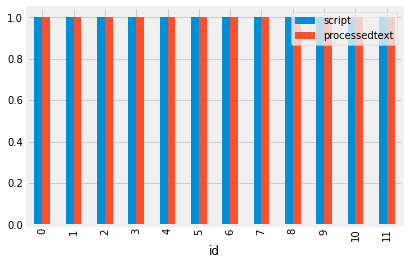

0.5


In [53]:
df.groupby('id').count().plot.bar(ylim=0)
plt.show()
print(6/12)

The 0.5 #Baseline accuracy which means this prediction algorithim will provides us a set of prediction that will be useful as we go deeper into the dataset 

###Step 3 – Pre-processing the Raw Text and Getting It Ready for Machine Learning

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

stemmer = PorterStemmer()
words = stopwords.words("english")

df['processedtext'] = df['script'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [21]:
print(df.shape)
df.head(10)

(12, 3)


id  ...                                                                                                                                                                                            processedtext
0  0  ...  donald trump hello iowa congratul iowa hawker that big win today i thrill back that big win but i thrill back especi great news big one you great school great team great tradit realli amaz job sta...
1  1  ...  donald trump we great great peopl run mani right i love marjori with help go take back hous send nanci pelosi back san francisco work hard bring back citi help much destroy like destroy nation the...
2  2  ...  greg gutfeld all right whi i say thing let get round two i want ask question covid covid wife met wife i know like six year ago mar lago she still gotten vaccin and i keep talk get get vaccin woul...
3  3  ...  donald trump as one nation america mourn loss brave brilliant american servic member savag barbar terrorist attack afghanistan these nobl american warrior laid live line duti they sacrific countri...
4  4  ...  donald trump thank thank wow big crowd i tell thi goe way back i wish show they like thi goe way back i look televis televis we show show you know becaus fake news right they fake news hello alaba...
5  5  ...  sean hanniti mr presid thank us sean hanniti let go back i number peopl tell specif condit specif warn gave person taliban joe biden tri blame sean hanniti i want first give opportun respond asses...
6  6  ...  donald trump thank much thank and thank charli introduct beauti fearless leadership turn point action turn point usa thank charli much let also express incred appreci thousand bold young proud ame...
7  7  ...  donald trump thank much thank audienc usa usa usa usa usa usa usa donald trump thank much thank matt what job he merced done cpac hot item you got lot peopl stand outsid tri get would anybodi like...
8  8  ...  brook rollin in way there topic elit big firm progress offic holder bureaucrat topic see bigger obstacl achiev ambit first amend the first amend bulwark liberti enabl us citizen resist everi turn ...
9  9  ...  audienc usa usa usa usa usa usa donald trump wow thank audienc usa usa usa usa usa usa usa crosstalk donald trump well i want thank ohio incred turnout thousand peopl tri get unbeliev hardwork pat...

[10 rows x 3 columns]

###Step 4 - Creating the Training and Test Datasets

In [22]:
from sklearn.model_selection import train_test_split

target = df['id']

X_train, X_test, y_train, y_test = train_test_split(df['processedtext'], target, test_size=0.30, random_state=100)

print(df.shape); print(X_train.shape); print(X_test.shape)

(12, 3)
(8,)
(4,)


In [26]:
y = df.id
print(y)

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
Name: id, dtype: object


In [27]:
x=df.drop('id',axis=1)
x.head()

script                                                                                                                                                                                            processedtext
0  \n\n\n\n \nDonald Trump: (00:13)\nHello, Iowa. Congratulations to the Iowa hawkers. That was a big win today. I’m thrilled to be back. That was a big win. But I am thrilled to be back especially o...  donald trump hello iowa congratul iowa hawker that big win today i thrill back that big win but i thrill back especi great news big one you great school great team great tradit realli amaz job sta...
1  \n\n\n\n \nDonald Trump: (03:37)\nWe have great, great people running. Many of them are right here. I love Marjorie. With your help, we’re going to take back the House and send Nancy Pelosi back t...  donald trump we great great peopl run mani right i love marjori with help go take back hous send nanci pelosi back san francisco work hard bring back citi help much destroy like destroy nation the...
2  \n\n\n\n \nGreg Gutfeld: (00:05)\nAll right. Why should I say a thing? Let’s just get to round two. I want to ask you a question about COVID because you had COVID and my wife, you met my wife, I d...  greg gutfeld all right whi i say thing let get round two i want ask question covid covid wife met wife i know like six year ago mar lago she still gotten vaccin and i keep talk get get vaccin woul...
3  \n\n\n\n \nDonald Trump: (00:00)\nAs one nation, America mourns the loss of our brave and brilliant American service members in a savage and barbaric terrorist attack in Afghanistan. These noble A...  donald trump as one nation america mourn loss brave brilliant american servic member savag barbar terrorist attack afghanistan these nobl american warrior laid live line duti they sacrific countri...
4  \n\n\n\n \nDonald Trump: (08:53)\nThank you. Thank you. Wow, this is a big crowd. I’ll tell you. This goes all the way back. I wish they’d show it because they just don’t do that. They don’t like…...  donald trump thank thank wow big crowd i tell thi goe way back i wish show they like thi goe way back i look televis televis we show show you know becaus fake news right they fake news hello alaba...

In [ ]:
#Most common split ratio used by data scientists is 80:20.

#A split ratio of 80:20 means that 80% of the data will go to the training set and 20% of the dataset will go to the testing set

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [30]:
print("shape of original dataset :", df.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (12, 3)
shape of input - training set (9, 2)
shape of output - training set (9,)
shape of input - testing set (3, 2)
shape of output - testing set (3,)


###Step 5 - Converting Text to Word Frequency Vectors with TfidfVectorizer.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

train_tfIdf = vectorizer_tfidf.fit_transform(X_train.values.astype('U'))

test_tfIdf = vectorizer_tfidf.transform(X_test.values.astype('U'))

print(vectorizer_tfidf.get_feature_names()[:10])

['abandon', 'abc', 'abdul', 'abid', 'abil', 'abolish', 'abolit', 'abort', 'abraham', 'abram']


In [57]:
# document, corpus
texts = ["donald trump hello iowa congratul iowa hawker that big win today i thrill back that big win but i thrill back especi great news big one you great school great team great tradit realli amaz job sta."]

In [59]:
vocab = sorted(set(word for sentence in texts for word in sentence.split()))
print(len(vocab), vocab)

26 ['amaz', 'back', 'big', 'but', 'congratul', 'donald', 'especi', 'great', 'hawker', 'hello', 'i', 'iowa', 'job', 'news', 'one', 'realli', 'school', 'sta.', 'team', 'that', 'thrill', 'today', 'tradit', 'trump', 'win', 'you']


In [60]:
import numpy as np
def binary_transform(text):
    # create a vector with all entries as 0
    output = np.zeros(len(vocab))
    # tokenize the input
    words = set(text.split())
    # for every word in vocab check if the doc contains it
    for i, v in enumerate(vocab):
        output[i] = v in words
    return output

In [61]:
# Example input
print(binary_transform("donald trump hello"))

[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0.]


In [62]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(binary=True)
vec.fit(texts)
print([w for w in sorted(vec.vocabulary_.keys())])

['amaz', 'back', 'big', 'but', 'congratul', 'donald', 'especi', 'great', 'hawker', 'hello', 'iowa', 'job', 'news', 'one', 'realli', 'school', 'sta', 'team', 'that', 'thrill', 'today', 'tradit', 'trump', 'win', 'you']


In [24]:
print(train_tfIdf.shape); print(test_tfIdf.shape)



(8, 2818)
(4, 2818)
